# **Setup**

Install, import, and stuff!

In [ ]:
!pip install tweepy

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.3MB/s 
     |████████████████████████████████| 6.5MB 8.6MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 


In [ ]:
import os
import time
import tweepy as tw
import pandas as pd
from tweepy import OAuthHandler
import geopandas as gpd
from tqdm import tqdm

print('Done!')

Done!


In [ ]:
consumer_key = 'fvV6AhveqaohFKFEU4ik3b37v'
consumer_secret = 'DIQ6eGUgXk6uVEuHl42HDy9C3VWa0RW88F02wJzQ7oR4XgL6dn'
access_token = '1388594064-YEpdPT7nJZAKrirFJMUaLT4574BYcS2afwWrU7c'
access_token_secret = 'AIHeAkZlmSsc3wTupKOOZ8Jn4iFhrSLfiKlKmIDmDrw1m'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

print('Ready!')

Ready!


# **Reading Data for Query Limits**

The agreed upon methodology for scraping tweets from Twitter would be to define a radius of geographic coverage for each barangay (measured from the center of all barangays). The centroid of each barangay, and the corresponding radius is defined in the following dataset:

In [ ]:
# Read Metro Manila Locations
loc_gdf = gpd.read_file('/content/drive/MyDrive/Startups/Project Sentinellium/1. Departments/Data Scientists/1. Datasets/NLP Datasets/0. Centroid and Radius/Barangay/metro_manila_brgy.shp')
print(loc_gdf.shape)
loc_gdf.sample(5)

(1691, 17)


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,radius,geometry
559,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25157,Barangay 762,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,120.103594,POINT (120.99651 14.56664)
693,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24721,Barangay 372,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,155.320934,POINT (120.98503 14.62455)
59,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24892,Barangay 527,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,144.222559,POINT (120.99870 14.61419)
1217,177,PHL,Philippines,47,Metropolitan Manila,958,Navotas,25359,San Rafael Village,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,787.194825,POINT (120.96199 14.63737)
800,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24828,Barangay 47,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,101.274114,POINT (120.96341 14.60841)


In [ ]:
loc_gdf.duplicated().sum()

0

In [ ]:
loc_gdf['NAME_3'].duplicated().sum()

413

In [ ]:
loc_gdf[['NAME_3', 'NAME_2']].duplicated().sum()

0

In [ ]:
loc_gdf[loc_gdf['NAME_3'].duplicated()].sort_values(by=['NAME_3']).head(20)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,radius,geometry
1642,177,PHL,Philippines,47,Metropolitan Manila,965,Taguig,25784,Bagumbayan,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,1127.155821,POINT (121.05533 14.47768)
1643,177,PHL,Philippines,47,Metropolitan Manila,965,Taguig,25785,Bambang,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,1127.217288,POINT (121.06629 14.52562)
1238,177,PHL,Philippines,47,Metropolitan Manila,960,Pasay City,25380,Barangay 1,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,145.478464,POINT (120.98744 14.55985)
364,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24430,Barangay 1,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,252.578104,POINT (120.96564 14.60383)
365,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24431,Barangay 10,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,71.681403,POINT (120.96865 14.60606)
1239,177,PHL,Philippines,47,Metropolitan Manila,960,Pasay City,25381,Barangay 10,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,142.650089,POINT (120.99005 14.55403)
1240,177,PHL,Philippines,47,Metropolitan Manila,960,Pasay City,25382,Barangay 100,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,142.678451,POINT (121.00117 14.54424)
366,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24432,Barangay 100,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,183.807532,POINT (120.95920 14.62198)
1241,177,PHL,Philippines,47,Metropolitan Manila,960,Pasay City,25383,Barangay 101,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,85.696176,POINT (121.00103 14.54560)
367,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,24433,Barangay 101,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,347.070368,POINT (120.95908 14.62504)


# **Scrape by Location**

Since barangay-attribution of the sentiment score is important, a methodology of knowing WHERE a tweet is associated should be devised. It is impossible to extract the exact ```lat,long``` coordinates of a tweet. However, it is possible to define a location from which tweets would be scraped. As such, we'll be using this capability from the ```Tweepy``` API.

## **Structure of Scraped from API**

To check how to create the stored version of the data, preferably in tabular form, I wanted to check what the API returns would be as I did not want to use the same implementation as the normal ```cursor``` implementations.

As such, as implemented below, I am viewing the raw JSON data. For better viewing of the returned JSON file, use this beautifier:

https://jsonformatter.curiousconcept.com/#

Or whatever you can use.

In [ ]:
location = '14.557894946251661,121.04647475317041,10mi'
keyword = 'covid'
api = tw.API(auth, parser=tw.parsers.JSONParser())
tweets = api.search(q=keyword, geocode=location, count=2, exclude_rts=True)
tweets

{'search_metadata': {'completed_in': 0.05,
  'count': 2,
  'max_id': 1348603754912706560,
  'max_id_str': '1348603754912706560',
  'next_results': '?max_id=1348603742707347455&q=covid&geocode=14.557894946251661%2C121.04647475317041%2C10mi&count=2&include_entities=1',
  'query': 'covid',
  'refresh_url': '?since_id=1348603754912706560&q=covid&geocode=14.557894946251661%2C121.04647475317041%2C10mi&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Mon Jan 11 12:12:45 +0000 2021',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 30162431,
      'id_str': '30162431',
      'indices': [3, 13],
      'name': 'Vico Sotto',
      'screen_name': 'VicoSotto'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 1348603754912706560,
   'id_str': '1348603754912706560',
   'in_reply_to_screen_name': None,
   'in_reply_to_status_id': None,
   

In [ ]:
tweets['statuses'][0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jan 11 12:12:45 +0000 2021',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 30162431,
    'id_str': '30162431',
    'indices': [3, 13],
    'name': 'Vico Sotto',
    'screen_name': 'VicoSotto'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1348603754912706560,
 'id_str': '1348603754912706560',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 534,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Jan 10 22:55:40 +0000 2021',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url

# **Define Helper Functions**

Based on the above JSON returned, I can now extract the relevant data that I need. Note that when the scraped JSON data was investigated, the statuses had fields that are
* descriptive of the tweet itself
* descriptive of the user who tweeted or retweeted the tweet

When creating the ```DataFrame``` below, I am interested in the **key-value pairs describing the tweet itself**. Observer below that these keys have values that are neither **list nor dict** which I can use (maybe).

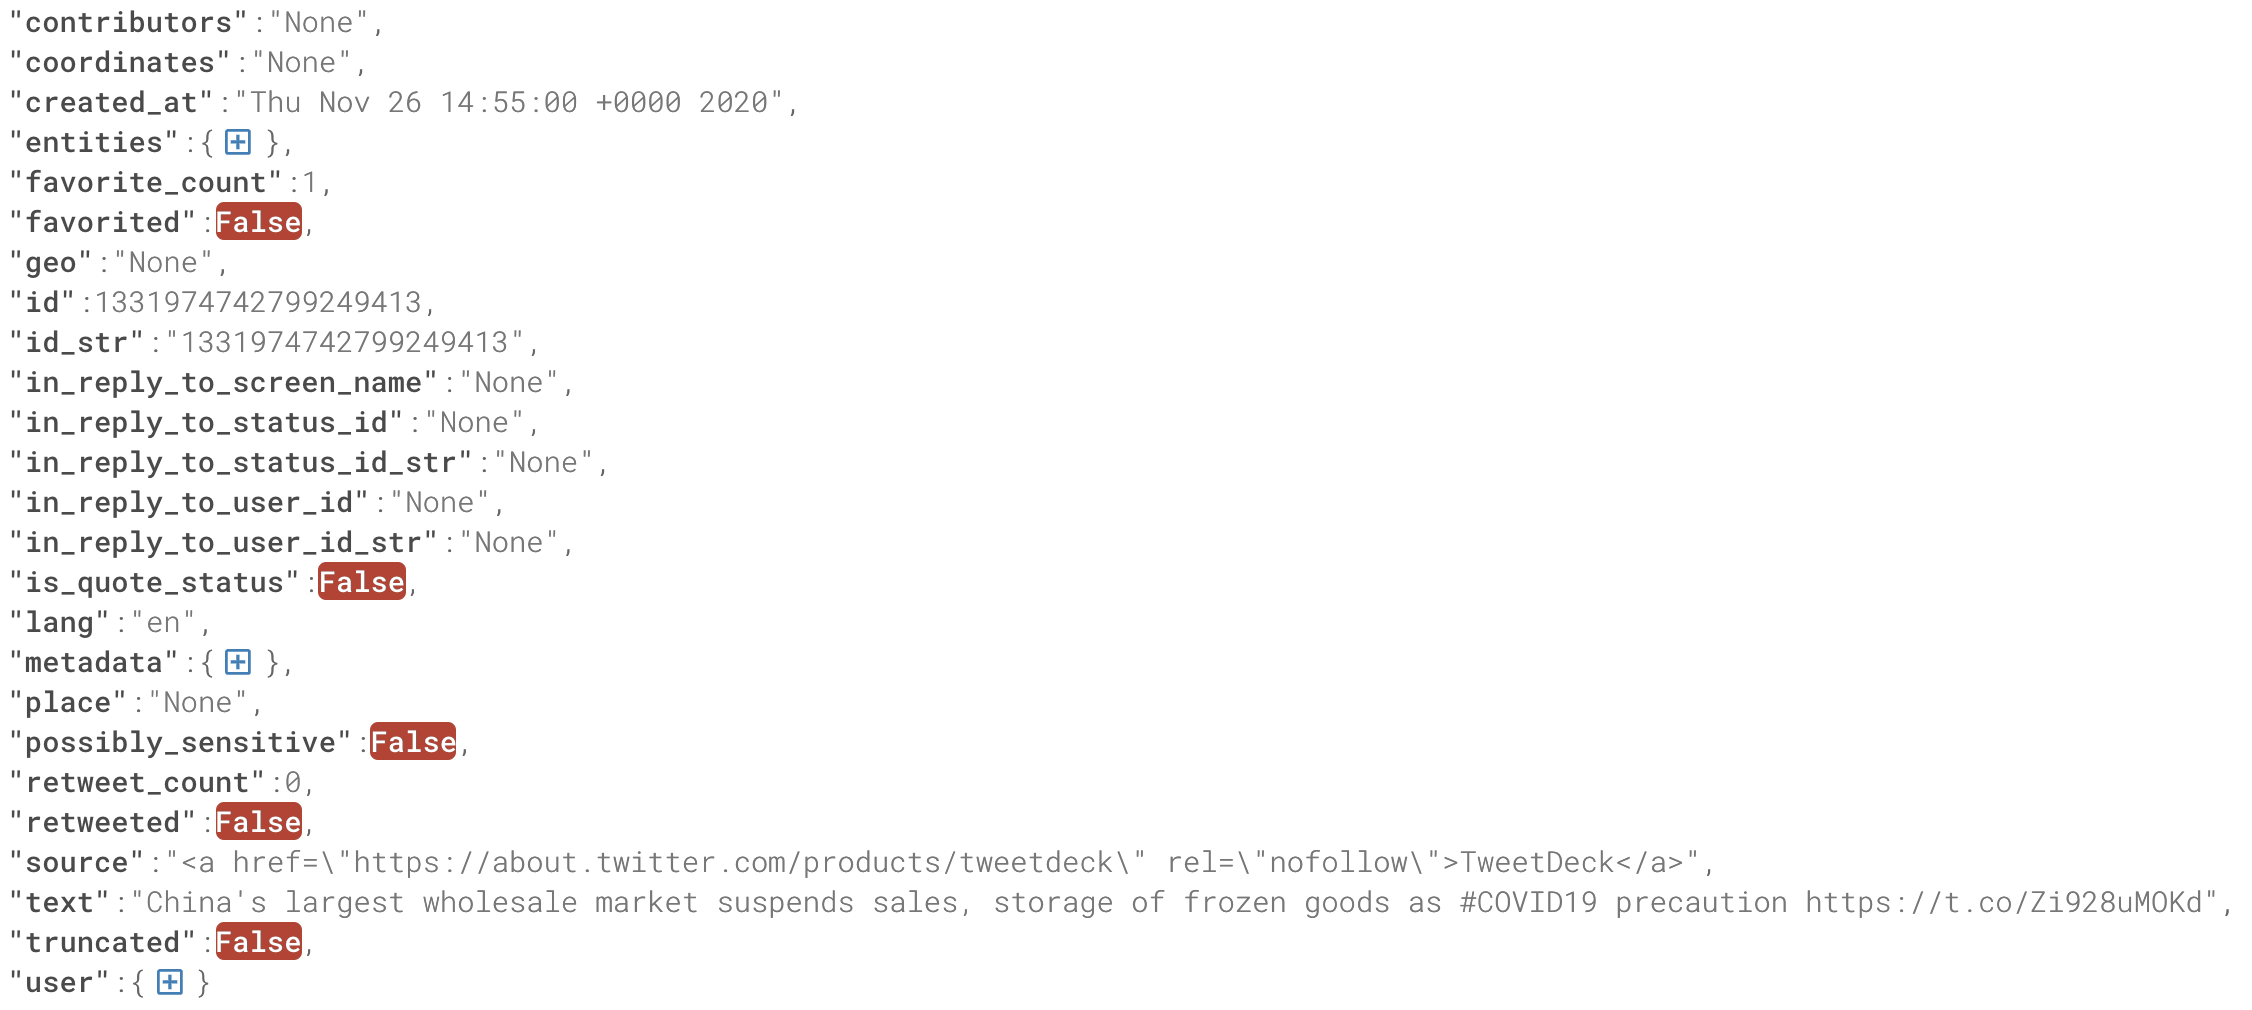

In [ ]:
def data_extractor(tweet_data):
  '''
  One tweet data is referring to one tweet from the ['statuses'] in the returned JSON.
  This function creates a dataframe representation of the tweet description PER TWEET.
  '''
  # Extract keys with values neither list nor dict (these are tweet descriptors)
  relevant_keys = [key for key in tweet_data.keys() if type(tweet_data[key]) not in [list, dict]]
  # Extract values from the dict using the list of keys
  vals = [tweet_data.get(key) for key in relevant_keys]
  # Create dictionary out of the two lists
  tweet_dict = dict(zip(relevant_keys, vals))

  # return pd.DataFrame(tweet_dict, index=[0])
  return tweet_dict

In [ ]:
def tweet_scraper(location, keyword, exclude):
  '''
  Function that returns a DataFrame already for every location and keyword specified.
  '''
  api = tw.API(auth, parser=tw.parsers.JSONParser())
  tweets = api.search(q=keyword, geocode=location, exclude_rts=exclude)
  tweets = tweets['statuses']

  scraped_df = pd.DataFrame([data_extractor(tweet) for tweet in tweets])

  return scraped_df

In [ ]:
def scrape_by_loc_v3(place, place_idx, out_path):
  '''
  INPUT: DataFrame of locations
  OUTPUT:
  - List of index with empty scraped tweets
  - DataFrame of scraped tweets PER LOCATION
  '''

  # location = f'{place.geometry.y},{place.geometry.x},{place.radius/1000}km'
  location = f'{place.geometry.y},{place.geometry.x},2km'
  tweets_per_loc_df = tweet_scraper(location=location, keyword='covid', exclude=True)

  if not tweets_per_loc_df.empty:
    tweets_per_loc_df['location_id'] = place_idx
    filename = place['NAME_3'] + '_tweets.csv'
    tweets_per_loc_df.to_csv(os.path.join(out_path, filename), index=False)

  print(f'Scraped tweets are saved in a dataframe in {out_path}')

  return tweets_per_loc_df

# **Implementation**

In [ ]:
output_path = '/content/drive/MyDrive/Startups/Project Sentinellium/1. Departments/Data Scientists/1. Datasets/NLP Datasets/0. Sample Location-Based Scraped Tweets/Full NCR - Past 1 Week'
output_file = 'ncr_scraped_tweets_full_Jan11.csv'

os.path.join(output_path, output_file)

'/content/drive/MyDrive/Startups/Project Sentinellium/1. Departments/Data Scientists/1. Datasets/NLP Datasets/0. Sample Location-Based Scraped Tweets/Full NCR - Past 1 Week/ncr_scraped_tweets_full_Jan11.csv'

In [ ]:
scraped_df = pd.DataFrame()
empty_locs = []

for idx, row in tqdm(loc_gdf.iterrows()):
  try:
    loc_tweets_df = scrape_by_loc_v3(place=row,
                                     place_idx=idx,
                                     out_path=output_path)
    
    if loc_tweets_df.empty:
      empty_locs.append([{'index':idx, 'brgy_name':row['NAME_3']}])
    else:
      scraped_df = pd.concat([scraped_df, loc_tweets_df], ignore_index=True)
  except Exception as e:
    print(e)
    time.sleep(910)
    continue

scraped_df.to_csv(os.path.join(output_path, output_file), index=False)
print('Saved successfully!')

print(empty_locs)
print(scraped_df.shape)
scraped_df.head()

179it [00:36,  6.73it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


360it [16:28,  2.83it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


541it [32:16,  3.93it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


722it [48:14,  3.02it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


903it [1:04:10,  3.36it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


1084it [1:20:10,  4.04it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


1265it [1:36:08,  3.95it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


1446it [1:52:03,  3.18it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


1627it [2:07:57,  2.91it/s]

[{'message': 'Rate limit exceeded', 'code': 88}]


1691it [2:23:26,  5.09s/it]

Saved successfully!
[[{'index': 76, 'brgy_name': 'Barangay 1'}], [{'index': 77, 'brgy_name': 'Barangay 10'}], [{'index': 78, 'brgy_name': 'Barangay 100'}], [{'index': 79, 'brgy_name': 'Barangay 101'}], [{'index': 80, 'brgy_name': 'Barangay 102'}], [{'index': 81, 'brgy_name': 'Barangay 103'}], [{'index': 82, 'brgy_name': 'Barangay 104'}], [{'index': 83, 'brgy_name': 'Barangay 105'}], [{'index': 84, 'brgy_name': 'Barangay 106'}], [{'index': 85, 'brgy_name': 'Barangay 107'}], [{'index': 86, 'brgy_name': 'Barangay 108'}], [{'index': 87, 'brgy_name': 'Barangay 109'}], [{'index': 88, 'brgy_name': 'Barangay 11'}], [{'index': 89, 'brgy_name': 'Barangay 110'}], [{'index': 90, 'brgy_name': 'Barangay 111'}], [{'index': 91, 'brgy_name': 'Barangay 112'}], [{'index': 92, 'brgy_name': 'Barangay 113'}], [{'index': 93, 'brgy_name': 'Barangay 114'}], [{'index': 94, 'brgy_name': 'Barangay 115'}], [{'index': 95, 'brgy_name': 'Barangay 116'}], [{'index': 96, 'brgy_name': 'Barangay 117'}], [{'index': 97, 'b

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,location_id,quoted_status_id,quoted_status_id_str,place
0,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,0,NaN,NaN,NaN
1,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,1,NaN,NaN,NaN
2,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,2,NaN,NaN,NaN
3,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,3,NaN,NaN,NaN
4,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,4,NaN,NaN,NaN


# **Saving Datasets**

## **Saving the Empty Locations in JSON**

In [ ]:
import json

output_path = '/content/drive/MyDrive/Startups/Project Sentinellium/1. Departments/Data Scientists/1. Datasets/NLP Datasets/0. Sample Location-Based Scraped Tweets/Full NCR - Past 1 Week'

with open(os.path.join(output_path, 'empty_locs_Jan11.txt'), 'w') as outfile:
  json.dump(empty_locs, outfile)

print('JSON dump done!')

JSON dump done!


## **Merging Scraped Tweets with Location DataFrame**

In [ ]:
loc_gdf['location_id'] = loc_gdf.index
merged_df = scraped_df.merge(loc_gdf, how='inner', on='location_id')
print(merged_df.shape)
merged_df.head()

(7320, 42)


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,location_id,quoted_status_id,quoted_status_id_str,place,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,radius,geometry
0,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,0,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25137,Barangay 744,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,216.282715,POINT (120.99399 14.57161)
1,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,1,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25138,Barangay 745,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,101.299290,POINT (120.99665 14.56931)
2,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,2,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25139,Barangay 746,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,168.911151,POINT (120.99682 14.56843)
3,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,3,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25140,Barangay 747,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,114.607434,POINT (120.99860 14.57137)
4,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",None,None,None,None,None,None,None,None,False,1,4,False,False,False,en,4,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25141,Barangay 748,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,190.229339,POINT (120.99827 14.57031)


## **Save Scraped Tweets DataFrame as CSV**

In [ ]:
merged_df.to_csv(os.path.join(output_path, 'ncr_scraped_tweets_brgy_full_merged_Jan11.csv'), index=False)
print('Done!')

Done!


# **Checking for Duplicates from Raw Scraped Tweets**

In this section, I had to check what might have caused the **presence of large numbers of duplicated tweets**.

Things to keep in mind:
* the scraper is **for the entire Metro Manila**
* we are only considered **the past 7 days**
* we are only scraping tweets with the **keyword='covid'**

Implications:
* since entire NCR, there COULD be possibly a lot of tweets (with the Ph being the Twitter capital of the world)
* however, since we are only considering the past 7 days and ONLY THOSE WITH COVID keyword in it, then it **might not be as huge as expected from a Twitter capital of the world** in a daily basis.

For simplicities sake, I just reloaded the saved scraped tweets as follows (note I did this investigation after the first saving the merged dataframe with location):

In [ ]:
file = '/content/drive/MyDrive/Startups/Project Sentinellium/1. Departments/Data Scientists/1. Datasets/NLP Datasets/0. Sample Location-Based Scraped Tweets/Full NCR - Past 1 Week/ncr_scraped_tweets_brgy_full_merged_Jan11.csv'

scraped_df_reloaded = pd.read_csv(file)
print(scraped_df_reloaded.shape)
scraped_df_reloaded.head()

(7320, 42)


,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,location_id,quoted_status_id,quoted_status_id_str,place,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,radius,geometry
0,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,0,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25137,Barangay 744,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,216.282715,POINT (120.9939878394376 14.57160524796298)
1,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,1,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25138,Barangay 745,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,101.299290,POINT (120.9966481196574 14.56931268262564)
2,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,2,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25139,Barangay 746,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,168.911151,POINT (120.9968164615776 14.56842705519975)
3,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,3,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25140,Barangay 747,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,114.607434,POINT (120.9986034954005 14.57136692129321)
4,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,4,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25141,Barangay 748,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,190.229339,POINT (120.9982716318935 14.57031470439275)


In [ ]:
scraped_df_reloaded.duplicated().sum()

0

If we consider all rows, there's no duplicated row **because each tweet has a unique ```id```**. As such, let's just consider the column ```text``` to check whether a tweet is duplicated or not.

In [ ]:
scraped_df_reloaded.duplicated(subset=['text']).sum()

7139

Here is an example of the duplicated tweet.

In [ ]:
duplicated_tweets = scraped_df_reloaded[scraped_df_reloaded.duplicated(subset=['text'])]
duplicated_tweets.head(2)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,location_id,quoted_status_id,quoted_status_id_str,place,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,radius,geometry
1,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,1,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25138,Barangay 745,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,101.299290,POINT (120.9966481196574 14.56931268262564)
2,Mon Jan 11 02:20:06 +0000 2021,1348454609472262144,1348454609472262144,Mayor Jerry Trenas representing The Iloilo Cit...,True,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,4,False,False,False,en,2,NaN,NaN,NaN,177,PHL,Philippines,47,Metropolitan Manila,955,Manila,25139,Barangay 746,NaN,NaN,Barangay,Village,Metropolitan Manila,Metropolitan Manila,168.911151,POINT (120.9968164615776 14.56842705519975)


In [ ]:
duplicated_tweets['is_quote_status'].value_counts()

False    5893
True     1246
Name: is_quote_status, dtype: int64

In [ ]:
duplicated_tweets['retweet_count'].value_counts()

0     6053
1      973
2       58
4       29
3       13
14      13
Name: retweet_count, dtype: int64

In [ ]:
duplicated_tweets['retweeted'].value_counts()

False    7139
Name: retweeted, dtype: int64

The above three "variables" seem to be **unreliable measures of whether a tweet is organic or not** as they do not even seem to align in Maths.

Looks like out of the 7k tweets scraped for the past 7 days from the entire of NCR with COVID as a keyword, only 176 which accounts for only 2.40 % of the COVID-related tweets. Yikes!

In [ ]:
duplicated_tweets['text'].nunique()

176

In [ ]:
(pd.to_datetime(scraped_df_reloaded['created_at']).dt.date).nunique()

8

I will try to investigate the duplication at a **daily basis** to check how rampant is it.

In [ ]:
scraped_df_reloaded['created_at'] = pd.to_datetime(scraped_df_reloaded['created_at'])
scraped_df_reloaded['date'] = scraped_df_reloaded['created_at'].dt.date
scraped_df_reloaded.shape

(7320, 43)

In [ ]:
tweets_df = scraped_df_reloaded[['text', 'date']]
tweets_df['duplicated?'] = scraped_df_reloaded.duplicated(subset='text')
tweets_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7320, 3)

In [ ]:
tweets_df.sample(15)

,text,date,duplicated?
3594,Congratulations Prof @cylpoon1 for a great le...,2021-01-10,True
6216,Are we doomed to repeat or surpass the worst C...,2021-01-09,True
232,Sayang naman b CA na sana kaso nyetang covid t...,2021-01-07,False
2170,I miss my papay and mamay(grandparents) 😭💔\n\n...,2021-01-10,True
1408,Covid lumayas ka na pls! Gusto ko pumunta sa K...,2021-01-10,True
7101,Page 9/365. Fiesta ng Nazareno kaya nagsimba k...,2021-01-09,True
2916,I miss my papay and mamay(grandparents) 😭💔\n\n...,2021-01-10,True
557,"covid got us, again? 🙃",2021-01-07,True
2441,Congratulations Prof @cylpoon1 for a great le...,2021-01-10,True
3281,Covid lumayas ka na pls! Gusto ko pumunta sa K...,2021-01-10,True


In [ ]:
tweets_df.groupby(by='date').agg(['count', 'sum', 'nunique'])

text  ... duplicated?
           count  ...     nunique
date              ...            
2021-01-04   214  ...           2
2021-01-05   295  ...           2
2021-01-06   224  ...           2
2021-01-07   346  ...           2
2021-01-08  1300  ...           2
2021-01-09  1086  ...           2
2021-01-10  2349  ...           2
2021-01-11  1506  ...           2

[8 rows x 6 columns]